### 教師あり学習：分類2

#### 評価方法・評価指標

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
import os

DATA_DIR = '/content/drive/MyDrive/project/ML/kai/longterm/data/classification'

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, 'classification_imb.csv'))
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,Target
0,0,2,0,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0.2,-1.000000,10,1,-1,0,0,11,1,1,0,1,3,2,0.424264,1.048415,0.434971,3.464102,0.5,0.7,0.2,0,2,10,1,10,1,8,4,4,3,9,0,1,1,0,1,0,1
1,1,3,8,0,0,1,0,0,0,0,0,0,0,0,13,0,1,0,0.4,0.7,1.401116,10,1,-1,0,1,1,1,1,0,1,74,3,0.374166,0.716511,0.386135,3.162278,0.7,0.6,0.5,1,0,9,1,10,1,10,7,3,3,8,0,1,1,1,1,0,1
2,2,1,1,1,0,0,0,0,1,0,0,0,0,0,3,0,0,1,0.6,0.7,1.348610,6,1,-1,0,0,0,1,1,0,1,34,2,0.400000,0.804109,0.378021,3.316625,0.8,0.0,0.4,2,2,9,4,9,1,3,4,1,2,8,0,1,1,1,0,0,1
3,5,1,9,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.2,0.3,-1.000000,5,1,0,0,1,1,1,1,2,1,65,3,0.316228,0.393385,0.293258,0.000000,0.0,0.2,0.6,2,2,9,1,7,0,9,5,1,3,8,0,1,1,0,0,0,1
4,0,1,2,0,0,1,0,0,0,0,0,0,0,0,10,1,0,0,0.1,0.1,-1.000000,11,1,0,0,0,0,1,1,2,1,39,1,0.316070,0.622063,-1.000000,2.645751,0.5,0.8,0.9,2,2,9,4,9,1,7,4,0,3,6,0,1,0,1,0,1,1


In [4]:
df.shape

(29760, 58)

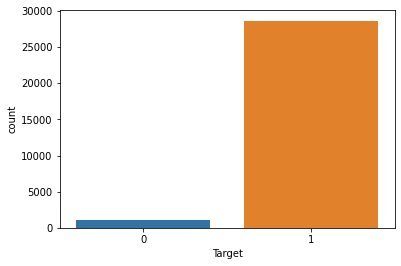

In [5]:
sns.countplot(df.Target)

In [6]:
x = df.drop('Target', axis=1).values
t = df['Target'].values

print(x.shape, t.shape)

(29760, 57) (29760,)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()
model.fit(x_train, t_train)

print(model.score(x_train, t_train))
print(model.score(x_test, t_test))

0.9632776497695853
0.961581541218638


In [12]:
y_pred = model.predict(x_test)

In [13]:
np.unique(y_pred)

array([1])

In [14]:
np.unique(t_test, return_counts=True)

(array([0, 1]), array([ 343, 8585]))

#### 混同行列 (Confusion Matrix)

In [15]:
from sklearn import metrics

In [16]:
labels = list(set(t))
c_matrix = metrics.confusion_matrix(t_test, y_pred, labels=labels)
c_matrix

array([[   0,  343],
       [   0, 8585]])

In [18]:
df_matrix = pd.DataFrame(c_matrix, columns=labels, index=labels)
df_matrix

,0,1
0,0,343
1,0,8585


Text(33.0, 0.5, 'Target')

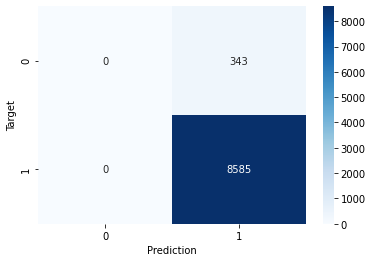

In [19]:
sns.heatmap(df_matrix, annot=True, fmt='.0f', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Target')

In [20]:
precision = metrics.precision_score(t_test, y_pred, average=None)
precision

array([0.        , 0.96158154])

In [21]:
recall = metrics.recall_score(t_test, y_pred, average=None)
recall

array([0., 1.])

In [22]:
f1_score = metrics.f1_score(t_test, y_pred, average=None)
f1_score

array([0.        , 0.98041455])

In [23]:
precision, recall, f1_score, total = metrics.precision_recall_fscore_support(t_test, y_pred)

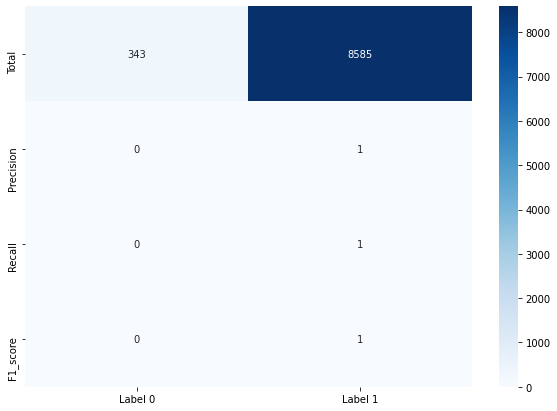

In [24]:
df_total = pd.DataFrame(
    np.array([total, precision, recall, f1_score]),
    index=['Total', 'Precision', 'Recall', 'F1_score'],
    columns=['Label 0', 'Label 1']
)

plt.figure(figsize=(10, 7))
sns.heatmap(df_total, annot=True, fmt='.0f', cmap='Blues')

#### ROC, AUC

In [25]:
y_proba = model.predict_proba(x_test)

In [26]:
y_proba[:3]

array([[0.02405937, 0.97594063],
       [0.0261481 , 0.9738519 ],
       [0.03066411, 0.96933589]])

In [27]:
fpr, tpr, threshold = metrics.roc_curve(t_test, y_proba[:,1])

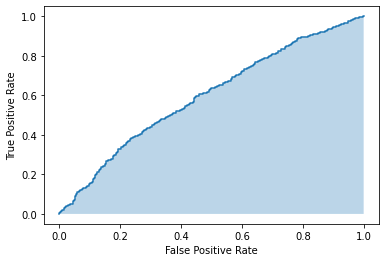

In [28]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr, tpr, alpha=0.3)

In [29]:
metrics.auc(fpr, tpr)

0.5955427715640712

#### 不均衡データへのアプローチ

In [30]:
# 分類の閾値の調整
y_proba = model.predict_proba(x_test)
y_proba[0]

array([0.02405937, 0.97594063])

Text(0, 0.5, 'Count')

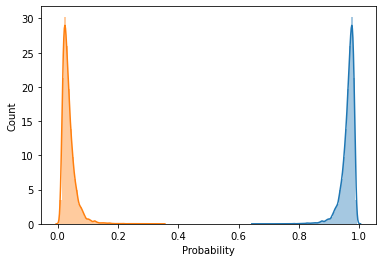

In [32]:
sns.distplot(y_proba[:, 1])
sns.distplot(y_proba[:, 0])
plt.xlabel('Probability')
plt.ylabel('Count')

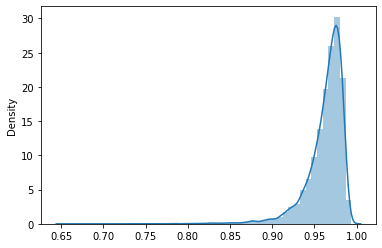

In [33]:
sns.distplot(y_proba[:, 1])

In [34]:
y_pred = (y_proba[:, 1] > 0.95).astype('i')

In [35]:
np.unique(y_pred, return_counts=True)

(array([0, 1], dtype=int32), array([1694, 7234]))

In [36]:
print('accuracy:', metrics.accuracy_score(t_test, y_pred))
print('recall:', metrics.recall_score(t_test, y_pred, average=None))

accuracy: 0.7940188172043011
recall: [0.28862974 0.81421083]


In [39]:
# 重みの調整
model = LogisticRegression(class_weight='balanced')
model.fit(x_train, t_train)

y_pred = model.predict(x_test)

print('accuracy:', metrics.accuracy_score(t_test, y_pred))
print('recall:', metrics.recall_score(t_test, y_pred, average=None))

accuracy: 0.6133512544802867
recall: [0.50145773 0.61782178]


In [41]:
# DownSampling
df_train = pd.DataFrame(x_train)
df_train['target'] = t_train
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,target
0,0.0,1.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,0.0,0.9,0.2,0.597913,5.0,1.0,0.0,9.0,0.0,17.0,0.0,1.0,2.0,1.0,104.0,2.0,0.447214,0.932804,0.409878,3.464102,0.5,0.6,0.0,1.0,1.0,8.0,3.0,10.0,3.0,14.0,7.0,1.0,7.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,1.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.9,1.6,1.780098,11.0,0.0,1.0,0.0,1.0,6.0,1.0,1.0,2.0,1.0,33.0,3.0,0.400000,1.006497,0.328634,3.741657,0.3,0.2,0.8,1.0,2.0,8.0,3.0,10.0,1.0,13.0,6.0,1.0,3.0,5.0,0.0,1.0,0.0,1.0,0.0,0.0,1
2,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,0.9,0.3,0.682825,7.0,1.0,-1.0,0.0,-1.0,11.0,1.0,1.0,2.0,1.0,103.0,3.0,0.316228,0.605570,0.358329,2.828427,0.8,0.6,0.2,2.0,4.0,7.0,2.0,7.0,3.0,4.0,10.0,1.0,0.0,9.0,0.0,0.0,0.0,1.0,1.0,1.0,1
3,5.0,1.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,1.2,1.155692,7.0,1.0,1.0,0.0,1.0,14.0,1.0,0.0,2.0,1.0,72.0,3.0,0.447214,1.197900,0.360139,3.605551,0.7,0.1,0.8,2.0,4.0,10.0,5.0,8.0,3.0,12.0,5.0,2.0,2.0,7.0,1.0,0.0,1.0,0.0,0.0,0.0,1
4,2.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.3,0.4,-1.000000,9.0,0.0,-1.0,0.0,-1.0,10.0,0.0,1.0,2.0,1.0,83.0,2.0,0.424264,0.947089,0.418569,2.828427,0.3,0.8,0.8,2.0,3.0,7.0,4.0,10.0,1.0,11.0,4.0,0.0,3.0,5.0,0.0,1.0,1.0,0.0,1.0,0.0,0


In [42]:
anomaly_indices = df_train[df_train['target'] == 0].index
num_records = len(anomaly_indices)
print(num_records)

765


In [44]:
normal_indices = df_train[df_train['target'] == 1].index
sampled_indices = np.random.choice(normal_indices, num_records, replace=False)
len(sampled_indices)

765

In [45]:
total_indices = np.concatenate([anomaly_indices, sampled_indices])
print(len(total_indices))

1530


In [46]:
df_undersampled = df_train.iloc[total_indices, :]

In [47]:
x_train_undersampled = df_undersampled.drop('target', axis=1).values
t_train_undersampled = df_undersampled['target'].values

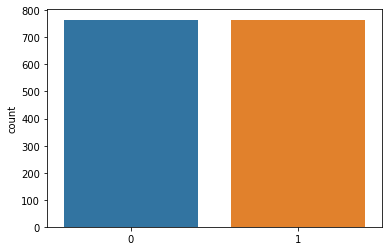

In [48]:
sns.countplot(t_train_undersampled)

In [49]:
model = LogisticRegression()
model.fit(x_train_undersampled, t_train_undersampled)
y_pred = model.predict(x_test)

print('accuracy:', metrics.accuracy_score(t_test, y_pred))
print('recall:', metrics.recall_score(t_test, y_pred, average=None))

accuracy: 0.5813172043010753
recall: [0.52478134 0.583576  ]


In [50]:
# OverSampling with SMOTE
from imblearn.over_sampling import SMOTE

In [51]:
smote = SMOTE(random_state=0, k_neighbors=10)

x_train_oversampled, t_train_oversampled = smote.fit_resample(x_train, t_train)

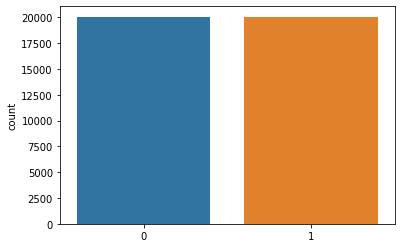

In [52]:
sns.countplot(t_train_oversampled)

In [53]:
model = LogisticRegression()
model.fit(x_train_oversampled, t_train_oversampled)
y_pred = model.predict(x_test)

print('accuracy:', metrics.accuracy_score(t_test, y_pred))
print('recall:', metrics.recall_score(t_test, y_pred, average=None))

accuracy: 0.6102150537634409
recall: [0.52769679 0.61351194]
